<a href="https://colab.research.google.com/github/Siddharth2808/ml/blob/main/Copy_of_support_vector_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Regression (SVR)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:,1 :-1].values
y = dataset.iloc[:, -1].values
y = y.reshape(len(y),1)

In [3]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [4]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler
sc1 = StandardScaler()
sc2 = StandardScaler()
X = sc1.fit_transform(X)
y= sc2.fit_transform(y)
print(X)
print(y)



[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [6]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, np.ravel(y))


SVR()

## Predicting a new result

In [7]:
sc2.inverse_transform([regressor.predict(sc1.transform([[6.5]]))])

array([[170370.0204065]])

## Visualising the SVR results

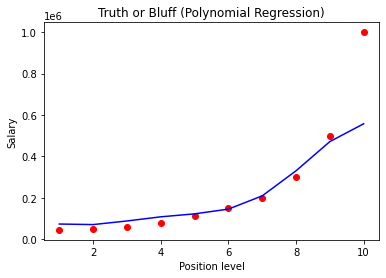

In [11]:
plt.scatter(sc1.inverse_transform(X), sc2.inverse_transform(y), color = 'red')
plt.plot(sc1.inverse_transform(X), sc2.inverse_transform(regressor.predict(X).reshape(len(regressor.predict(X)),1)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

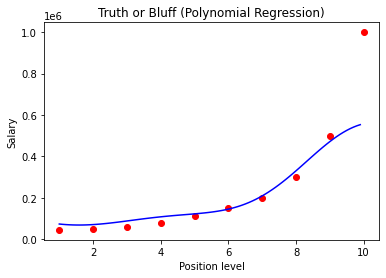

In [14]:
X_grid = np.arange(min(sc1.inverse_transform(X)), max(sc1.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
k=regressor.predict(sc1.transform(X_grid))
plt.scatter(sc1.inverse_transform(X), sc2.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc2.inverse_transform(k.reshape(len(k),1)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()